In [194]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import random
import matplotlib.ticker as tck
import seaborn as sns

First of all let's create data for simple linear regression. We consider that this is general population. 

In [195]:
x, y = make_regression(n_samples=1000, n_features=1, noise=107,random_state=3)

Let's look at scatter plot.

<IPython.core.display.Javascript object>


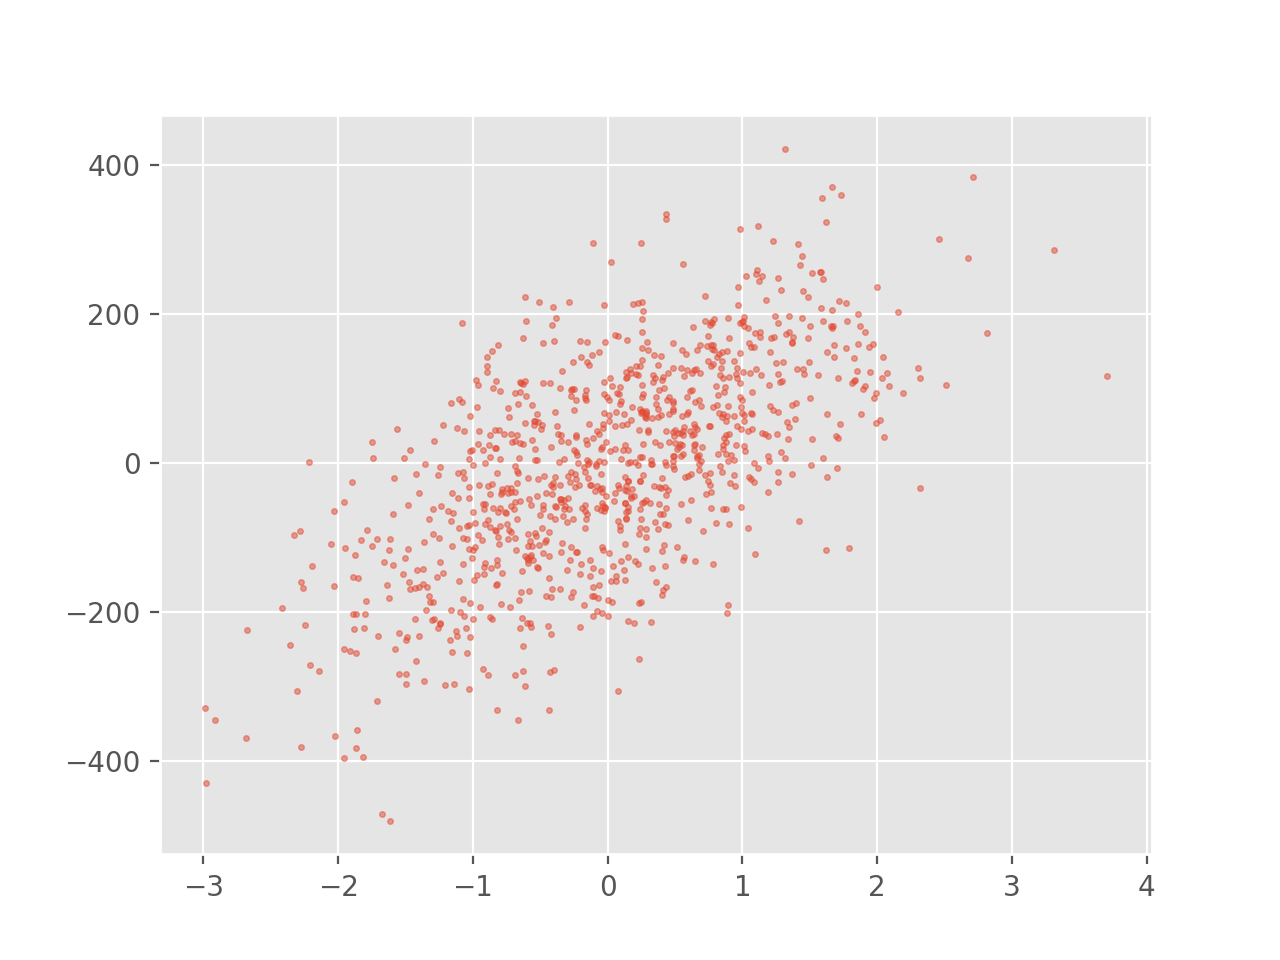

In [196]:
%matplotlib notebook
plt.scatter(x,y,s=4,alpha=0.5)
plt.show()

Now we plot linear regression line, histogram and density for x and y.

<IPython.core.display.Javascript object>


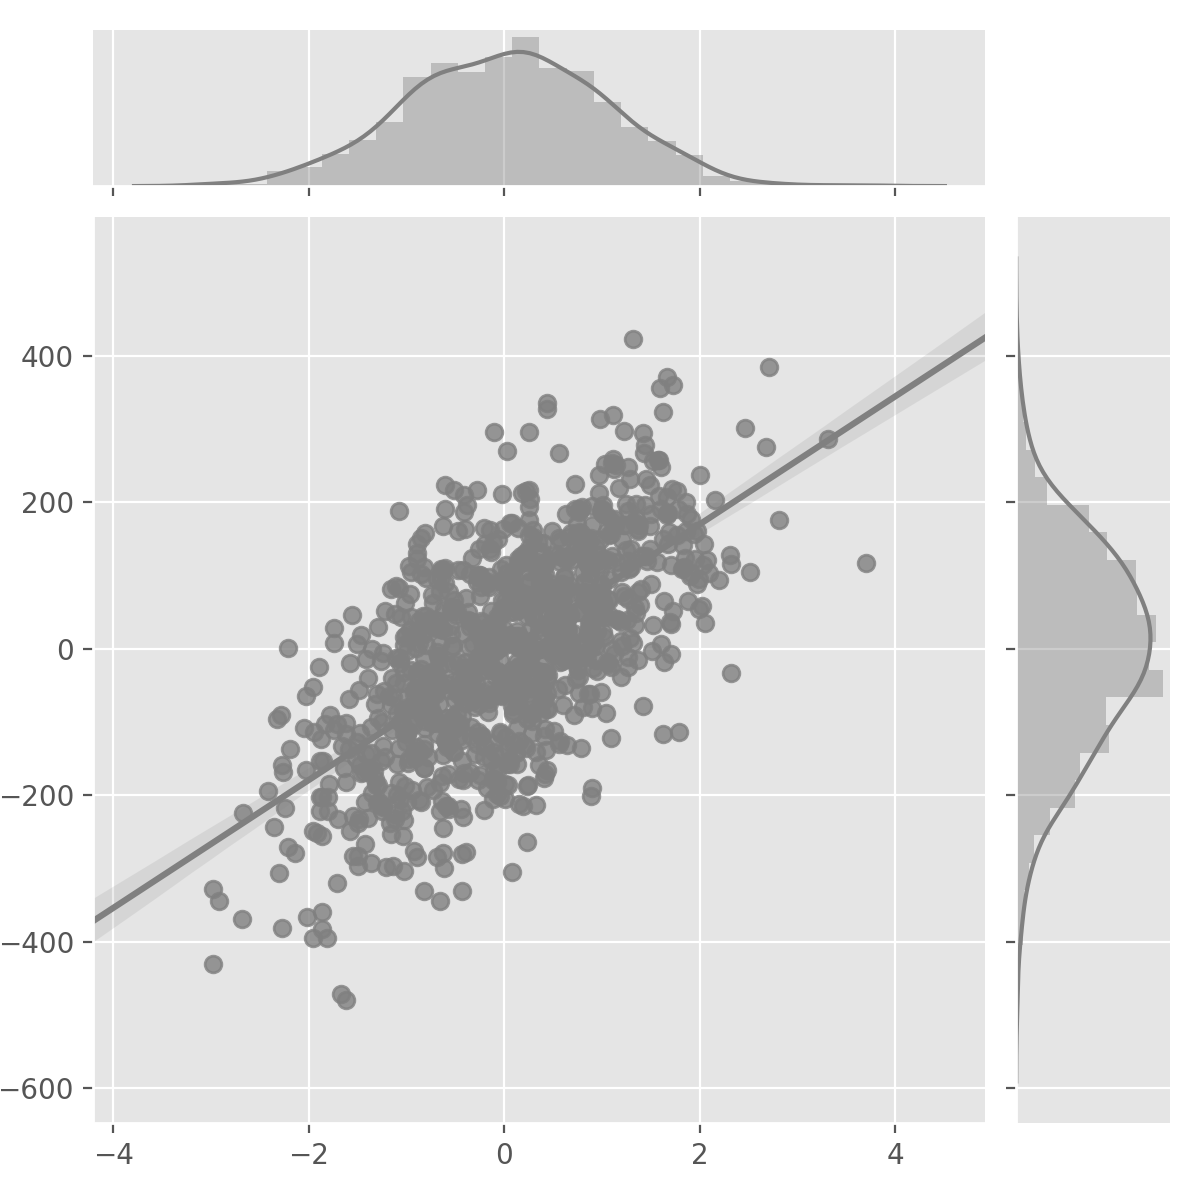

In [197]:
%matplotlib notebook
sns.jointplot(x.reshape((1000,)),y, kind="reg",color="grey")
plt.show()

It's look like there is no heteroskedasticity in this model.

Let's create model and fit the data.

In [198]:
model = LinearRegression().fit(x,y)

$\beta_0,\beta_1$ will be.

In [202]:
beta0=model.intercept_
print(beta0)

-4.550320286545991


In [203]:
beta1=model.coef_
print(beta1)

[87.27592278]


Let's create function that for every x,y and sample size will return $\overline{R^2},\overline{\beta_0},\overline{\beta_1},\beta_0,\beta_1$

In [204]:
def bashx(x,y,n):
    b0=np.array([])
    b1=np.array([])
    r2=np.array([])
    t=y.tolist()
    v=x.reshape((1000,)).tolist()
    for i in range(1000):
        k=random.sample(list(zip(v,t)),n)
        r,u=zip(*k)
        r=np.array(r)
        u=np.array(u)
        model1=LinearRegression().fit(r.reshape((-1,1)),u)
        inter=model1.intercept_
        coe=model1.coef_
        qual=model.score(r.reshape((-1,1)),u)
        b0=np.append(b0,inter)
        b1=np.append(b1,coe)
        r2=np.append(r2,qual)
    r2mij=np.mean(r2)
    b0mij=np.mean(b0)
    b1mij=np.mean(b1)
    return b0,b1,r2mij,b0mij,b1mij
        

We do this to get $\beta_0$ and $\beta_1 $ distributions.

In [205]:
n=[100,300,500,800,900,950,990,1000]

For every sample sizes we run the function and plot $\beta_0$ and $\beta_1 $ histograms.

<IPython.core.display.Javascript object>


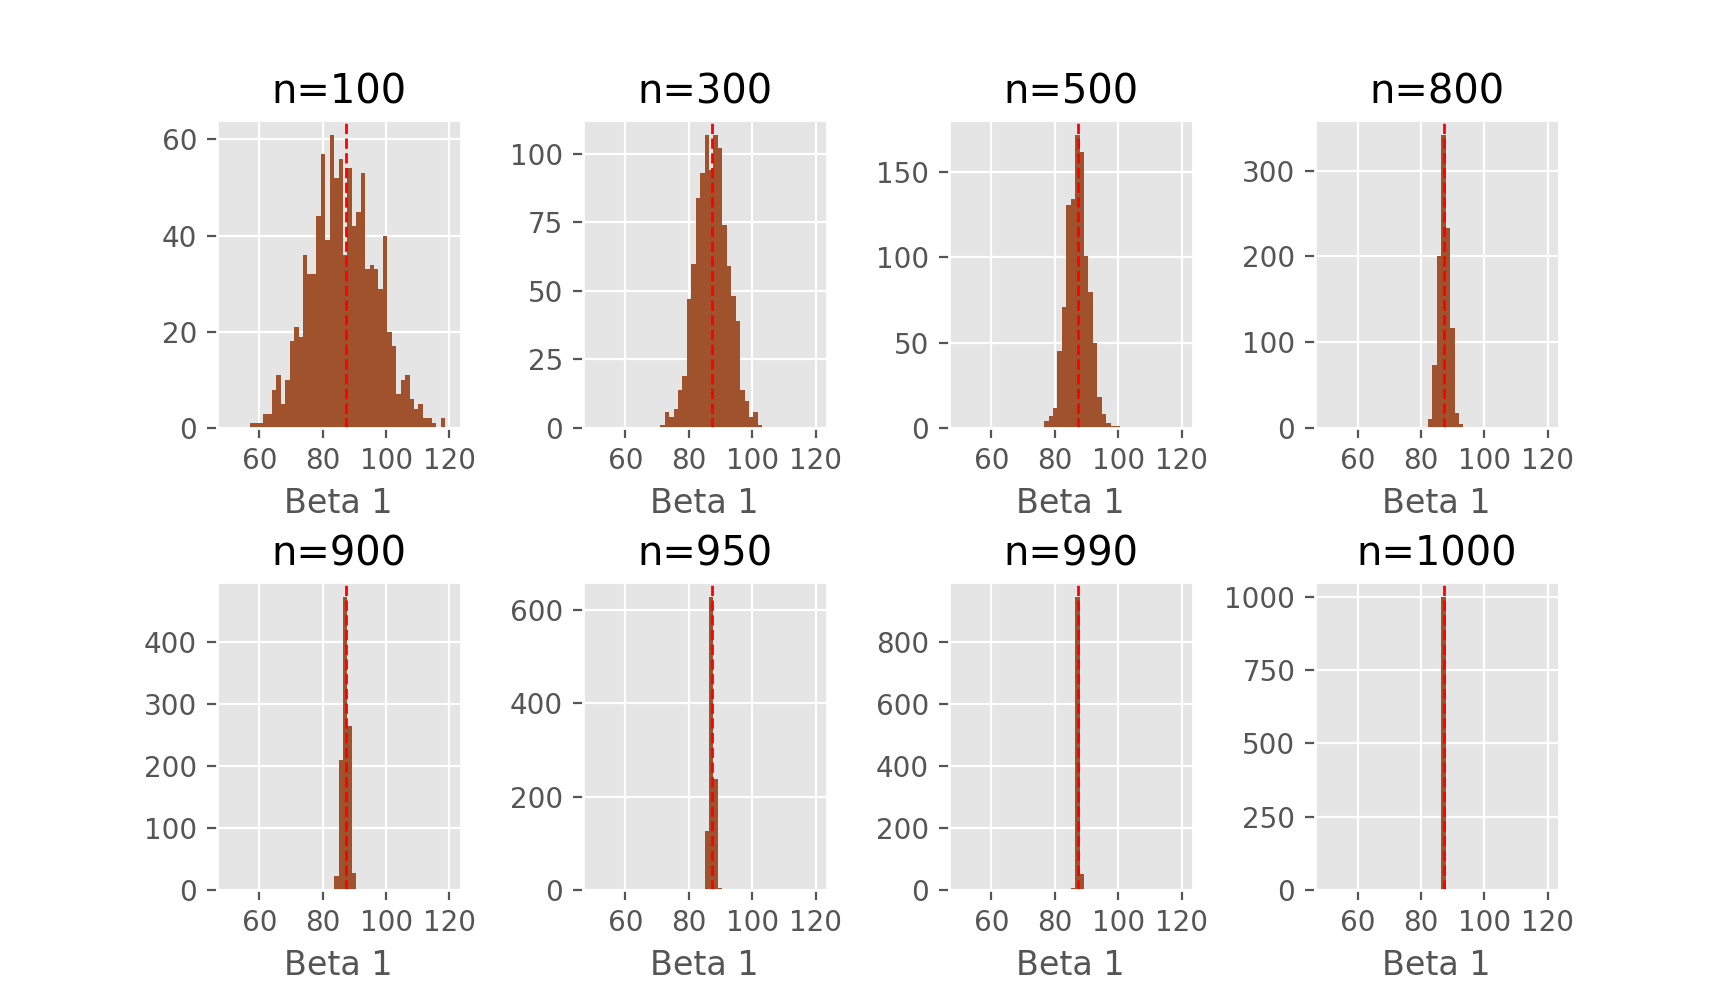

In [206]:
%matplotlib notebook
fig=plt.figure()
for i in range(1,9):
    b0,b1,r2mij,b0mij,b1mij=bashx(x,y,n[i-1])
    ax=fig.add_subplot(2,4,i)
    ax.hist(b1,bins=50,range=(50,120),color="sienna")
    ax.set_title("n="+str(n[i-1]))
    ax.set_xlabel("Beta 1")
    ax.xaxis.set_major_locator(tck.MultipleLocator(base=20))
    ax.axvline(beta1, color='r', linestyle='dashed', linewidth=1)
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
plt.show()

<IPython.core.display.Javascript object>


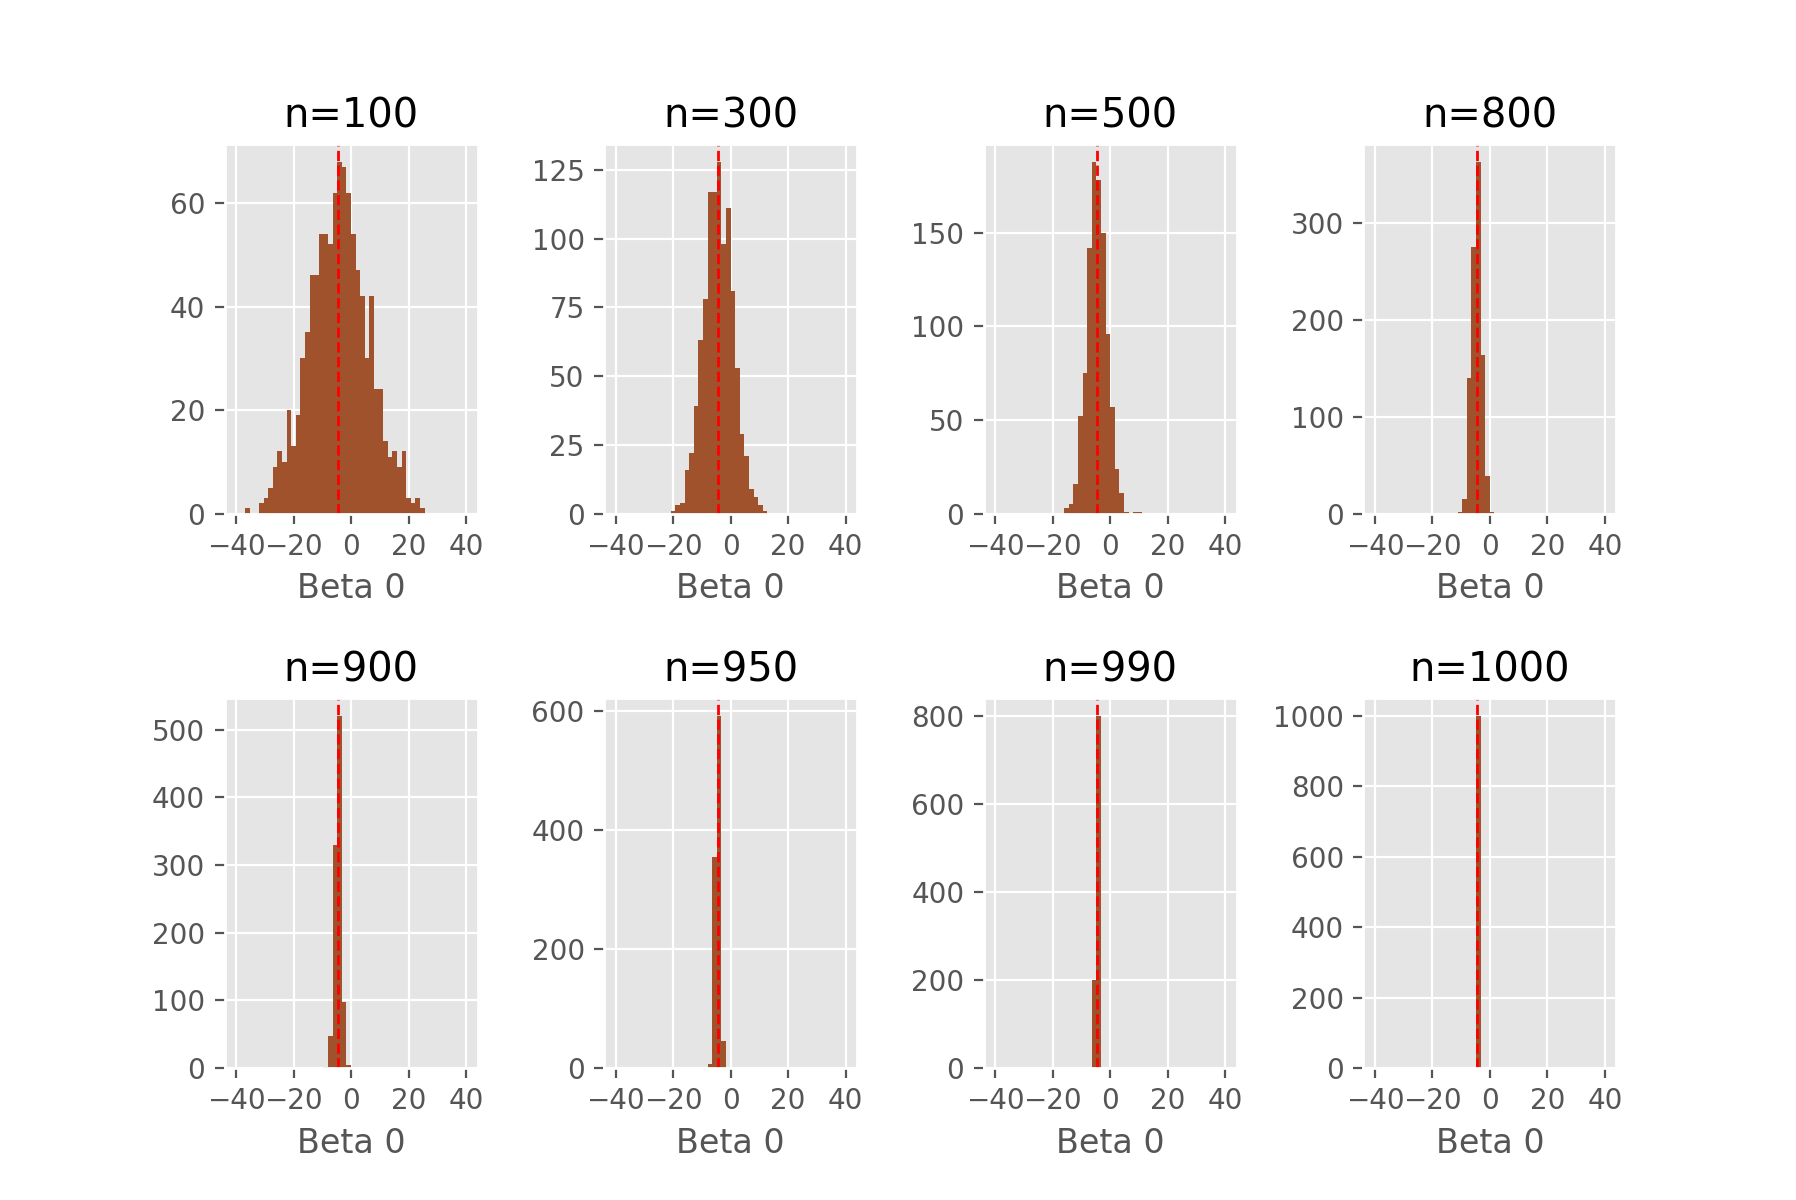

In [207]:
%matplotlib notebook
fig=plt.figure()
for i in range(1,9):
    b0,b1,r2mij,b0mij,b1mij=bashx(x,y,n[i-1])
    ax=fig.add_subplot(2,4,i)
    ax.hist(b0,bins=50,range=(-40,40),color="sienna")
    ax.set_title("n="+str(n[i-1]))
    ax.set_xlabel("Beta 0")
    ax.xaxis.set_major_locator(tck.MultipleLocator(base=20))
    ax.axvline(beta0, color='r', linestyle='dashed', linewidth=1)
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
plt.show()

In this plots we can see, that when sample size become bigger the means remains same and they are equal to general population coefficients (red lines). This is show that we have unbiased estimators for $\beta_1$ and $\beta_0$.

Now let's plot density plots for every sample size.

<IPython.core.display.Javascript object>


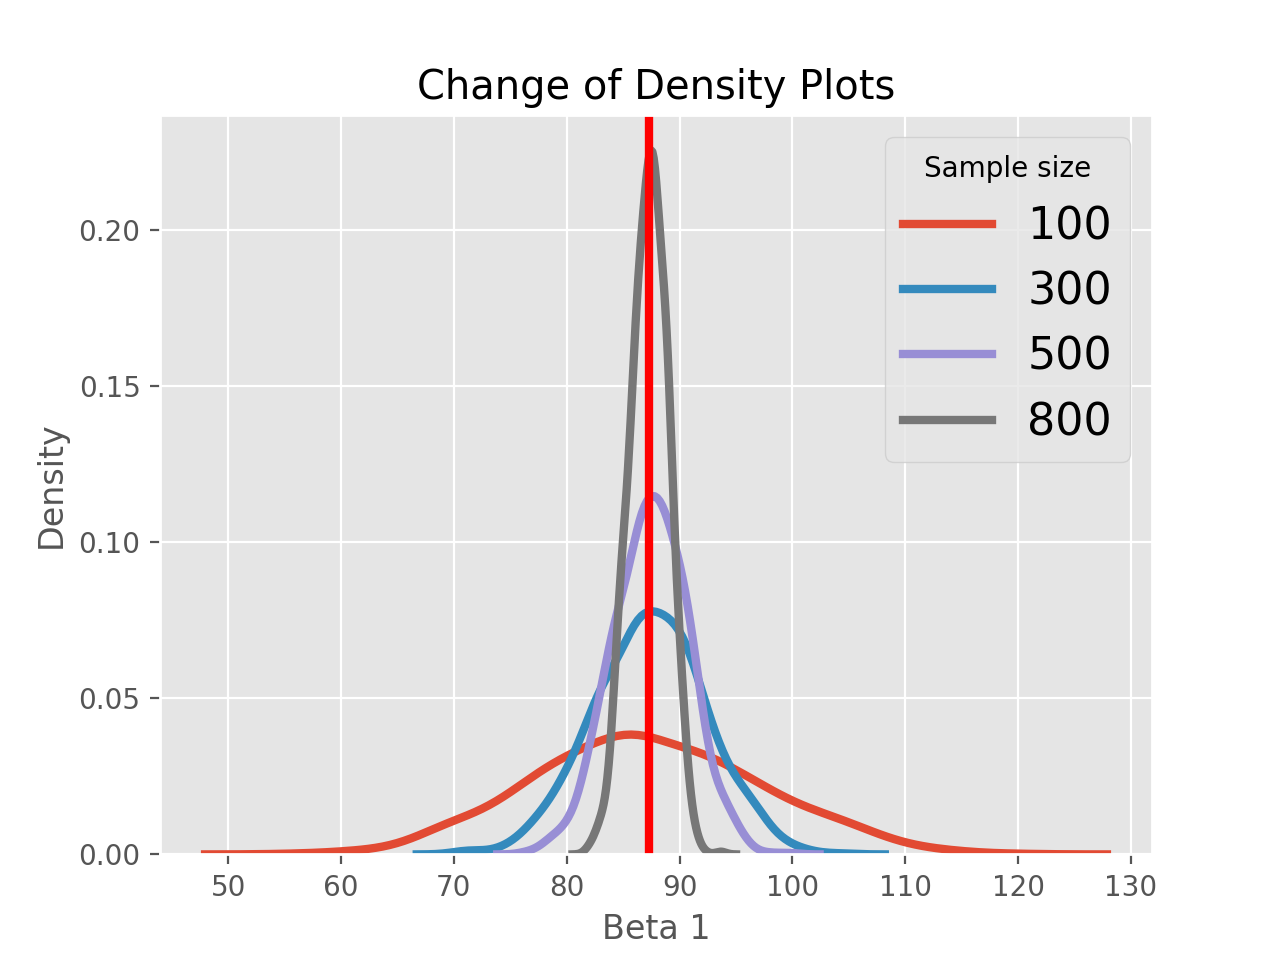

In [208]:
%matplotlib notebook
plt.style.use("ggplot")
for i in range(1,5):
    b0,b1,r2mij,b0mij,b1mij=bashx(x,y,n[i-1])
    sns.distplot(b1, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label=n[i-1])
plt.legend(prop={'size': 16}, title = 'Sample size')
plt.title('Change of Density Plots')
plt.xlabel("Beta 1")
plt.ylabel("Density")
plt.axvline(beta1, color='r', linewidth=3)
plt.show()

<IPython.core.display.Javascript object>


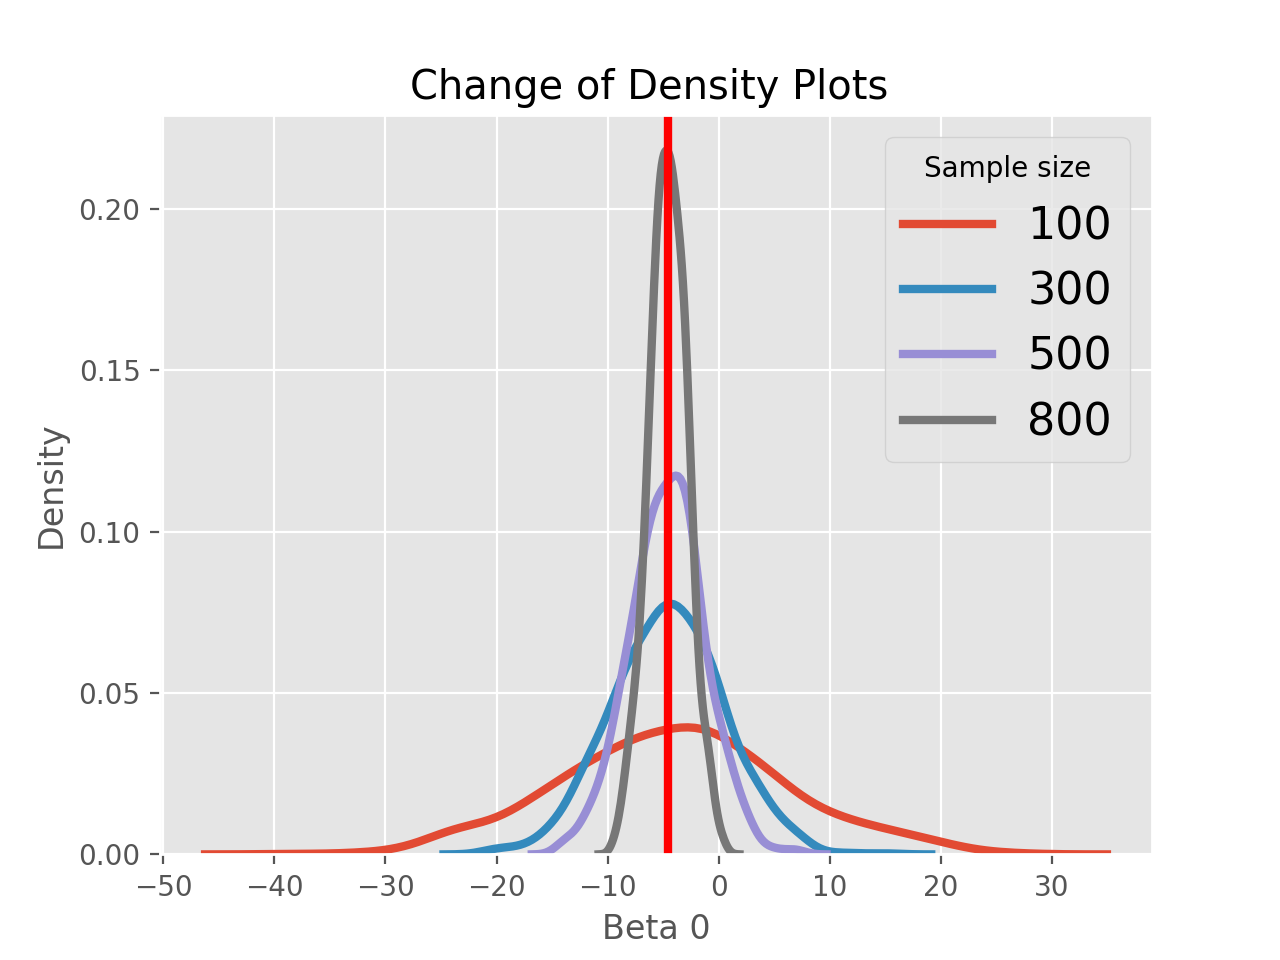

In [213]:
%matplotlib notebook
plt.style.use("ggplot")
for i in range(1,5):
    b0,b1,r2mij,b0mij,b1mij=bashx(x,y,n[i-1])
    sns.distplot(b0, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label=n[i-1])
plt.legend(prop={'size': 16}, title = 'Sample size')
plt.title('Change of Density Plots ')
plt.xlabel("Beta 0")
plt.ylabel("Density")
plt.axvline(beta0, color='r', linewidth=3)
plt.show()

This plots showes more precise that estimators are unbiased and also consistent, because when sample size become bigger, than $P(\hat{\beta_1}=\beta_1)$ and $P(\hat{\beta_0}=\beta_0)$ approaches 1.

In [211]:
R2=np.array([])
B0m=np.array([])
B1m=np.array([])
for i in range(1,9):
    b0,b1,r2mij,b0mij,b1mij=bashx(x,y,n[i-1])
    R2=np.append(R2,r2mij)
    B0m=np.append(B0m,b0mij)
    B1m=np.append(B1m,b1mij)

<IPython.core.display.Javascript object>


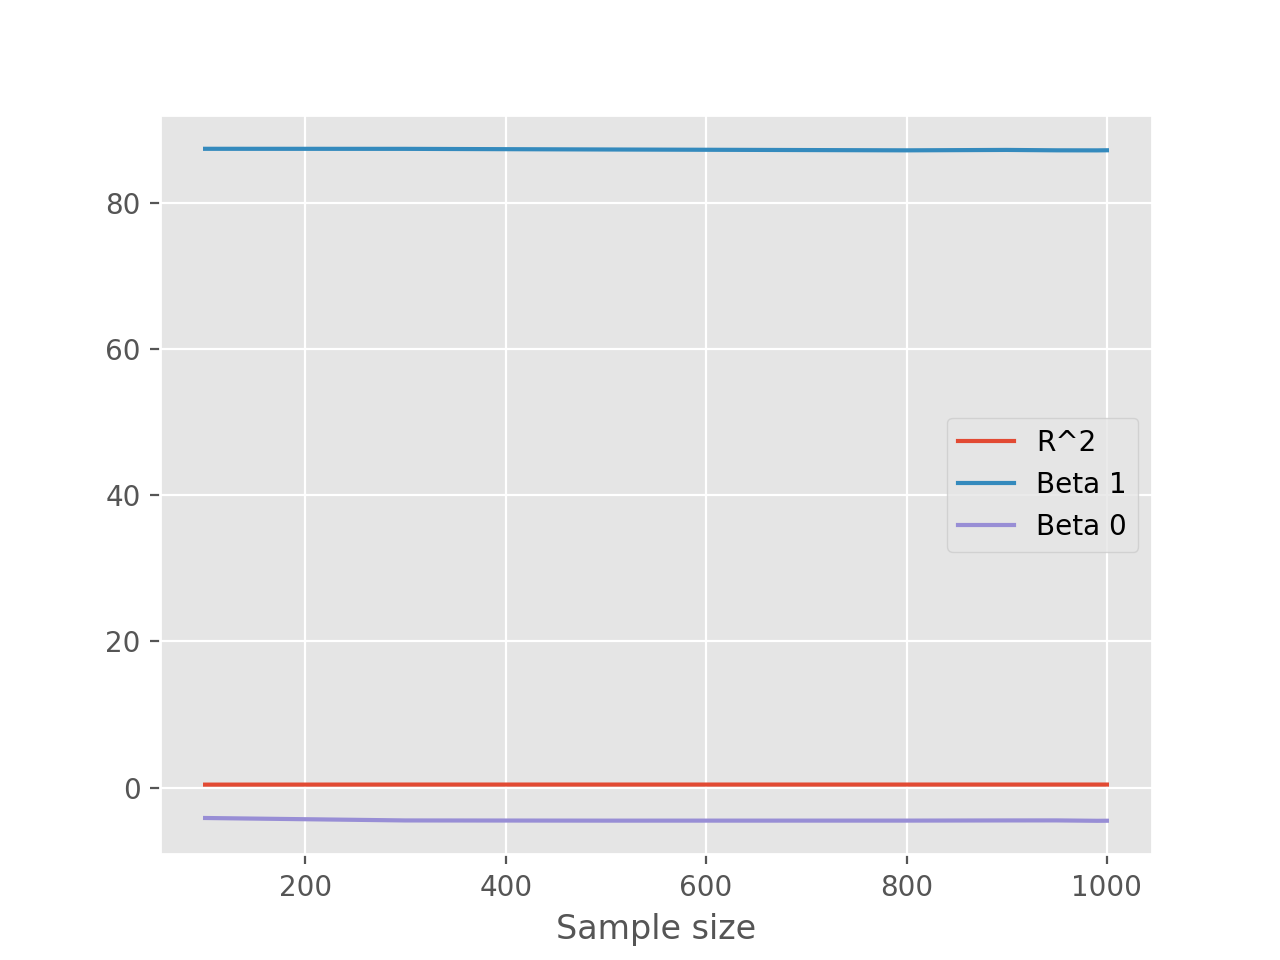

In [229]:
%matplotlib notebook
plt.plot(n,R2,label="R^2")
plt.plot(n,B1m,label="Beta 1")
plt.plot(n,B0m,label="Beta 0")
plt.xlabel("Sample size")
plt.legend()
plt.show()

And we see that $R^2$ also remains constant.